# Explore Real-Time Data on Iguazio via Integrated Notebooks

## Analyze Real-Time Data Using Spark Streaming, SQL, and ML
iguazio database apears to Spark as native Spark Data Frames<br>
Spark is auto-provisioned and configured on iguazio platform, no DevOps requiered 

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Iguazio Integration demo").getOrCreate()

In [2]:
spark.read.format("io.iguaz.v3io.spark.sql.kv").load("v3io://bigdata/stocks").show()

+-------+--------+------+--------+-------------------+--------------------+--------+--------+
|  price|  volume|symbol|exchange|         last_trade|                name|currency|timezone|
+-------+--------+------+--------+-------------------+--------------------+--------+--------+
|1019.07| 1300582|  GOOG|  NASDAQ|2018-12-17 15:16:22|Alphabet Inc Class C|     USD|     EST|
| 262.85| 7609475|  NFLX|  NASDAQ|2018-12-17 15:24:29|       Netflix, Inc.|     USD|     EST|
|  45.88|18816084|  ORCL|    NYSE|2018-12-17 15:16:52|  Oracle Corporation|     USD|     EST|
|1512.75| 6554826|  AMZN|  NASDAQ|2018-12-17 15:26:18|    Amazon.com, Inc.|     USD|     EST|
| 102.68|29644678|  MSFT|  NASDAQ|2018-12-17 15:20:27|Microsoft Corpora...|     USD|     EST|
|   46.9|14897397|  INTC|  NASDAQ|2018-12-17 15:26:24|   Intel Corporation|     USD|     EST|
| 163.65|29479607|  AAPL|  NASDAQ|2018-12-17 15:28:23|          Apple Inc.|     USD|     EST|
| 138.53|13745386|    FB|  NASDAQ|2018-12-17 15:28:17|Facebo

## Run Interactive SQL Queries on Real-Time Data
Support full ANSI SQL through native integration of Apache Presto over iguazio database<br>
Same data apears through different APIs (Spark, Presto SQL, native Pandas, DynamoDB like API)

In [3]:
%sql select * from bigdata.stocks where exchange='NASDAQ'

Done.


volume,symbol,last_trade,price,timezone,name,exchange,currency
29644678,MSFT,2018-12-17 15:20:27,102.68,EST,Microsoft Corporation,NASDAQ,USD
14897397,INTC,2018-12-17 15:26:24,46.9,EST,Intel Corporation,NASDAQ,USD
29479607,AAPL,2018-12-17 15:28:23,163.65,EST,Apple Inc.,NASDAQ,USD
13745386,FB,2018-12-17 15:28:17,138.53,EST,"Facebook, Inc. Common Stock",NASDAQ,USD
6554826,AMZN,2018-12-17 15:26:18,1512.75,EST,"Amazon.com, Inc.",NASDAQ,USD
1300582,GOOG,2018-12-17 15:16:22,1019.07,EST,Alphabet Inc Class C,NASDAQ,USD
5674590,TSLA,2018-12-17 15:26:20,347.86,EST,Tesla Inc,NASDAQ,USD
7609475,NFLX,2018-12-17 15:24:29,262.85,EST,"Netflix, Inc.",NASDAQ,USD


## Read NoSQL Data as Real-Time DataFrame Stream
`frames` is a high-performance streaming API into iguazio database presented as Pandas DataFrame<br>
support multiple backend data models (Key/value, Time-series, Stream, Object/file) 

In [ ]:
# fill the following environment var with real password
%env V3IO_PASSWORD = <V3IO-Password>

In [1]:
import pandas as pd
import v3io_frames as v3f
client = v3f.Client('v3io-framesd:8081', password=os.getenv('V3IO_PASSWORD'))

In [2]:
kvdf = client.read(backend='kv', table='stocks', filter='exchange=="NASDAQ"')
kvdf.head()

,price,last_trade,timezone,volume,currency,exchange,name,symbol
__name,,,,,,,,
FB,138.53,2018-12-17 15:28:17,EST,13745386,USD,NASDAQ,"Facebook, Inc. Common Stock",FB
TSLA,347.86,2018-12-17 15:26:20,EST,5674590,USD,NASDAQ,Tesla Inc,TSLA
NFLX,262.85,2018-12-17 15:24:29,EST,7609475,USD,NASDAQ,"Netflix, Inc.",NFLX
GOOG,1019.07,2018-12-17 15:16:22,EST,1300582,USD,NASDAQ,Alphabet Inc Class C,GOOG
INTC,46.90,2018-12-17 15:26:24,EST,14897397,USD,NASDAQ,Intel Corporation,INTC


## Read the Time-Series data (in iguazio TSDB) as Pandas DataFrame
Use database side aggregations, joins and filtering on the real-time metrics data

In [4]:
# Read Time-Series aggregates from the DB (returned as a data stream, use concat to assemble the frames)
tsdf = client.read(backend='tsdb', table='stock_metrics', step='60m', aggragators='avg,max,last',start="now-2d", end='now')

# turn the results to a Multi-indexed and pivoted table 
pvt = tsdf.pivot_table('values',['Date','symbol','exchange'],['metric_name','Aggregate'])
pvt.head(15)

metric_name                                price                    \
Aggregate                                    avg     last      max   
Date                symbol exchange                                  
2018-12-17 08:44:13 AAPL   NASDAQ     166.526667   166.10   167.13   
                    AMZN   NASDAQ    1553.282667  1542.44  1567.00   
                    FB     NASDAQ     142.827333   142.51   143.20   
                    GOOG   NASDAQ    1035.372000  1032.46  1039.20   
                    INTC   NASDAQ      47.922000    47.81    48.05   
                    MSFT   NASDAQ     104.468000   104.15   104.94   
                    NFLX   NASDAQ     266.273333   264.24   268.61   
                    TSLA   NASDAQ     360.731333   357.58   363.21   
2018-12-17 09:44:13 AAPL   NASDAQ     166.894000   167.41   167.64   
                    AMZN   NASDAQ    1550.543667  1559.57  1569.43   
                    FB     NASDAQ     142.986833   143.81   143.91   
                    GOOG   NASDAQ    1035.078167  1040.50  1044.28   
                    INTC   NASDAQ      47.962333    48.11    48.22   
                    MSFT   NASDAQ     104.591833   105.08   105.14   
                    NFLX   NASDAQ     265.930833   268.95   269.67   

metric_name                                 volume                       
Aggregate                                      avg      last        max  
Date                symbol exchange                                      
2018-12-17 08:44:13 AAPL   NASDAQ    262387.000000  157264.0   953909.0  
                    AMZN   NASDAQ     70763.666667   57890.0   284844.0  
                    FB     NASDAQ     85823.400000   55600.0   329193.0  
                    GOOG   NASDAQ      7459.533333    1668.0    27734.0  
                    INTC   NASDAQ    107208.000000   71445.0   463225.0  
                    MSFT   NASDAQ    227910.666667  134693.0  1091784.0  
                    NFLX   NASDAQ     70901.000000   30613.0   224372.0  
                    TSLA   NASDAQ     50147.866667   50261.0   203851.0  
2018-12-17 09:44:13 AAPL   NASDAQ    114045.500000   60657.0   261714.0  
                    AMZN   NASDAQ     30136.133333   16026.0    56916.0  
                    FB     NASDAQ     53060.533333   30887.0   158551.0  
                    GOOG   NASDAQ      5192.883333    1417.0    21235.0  
                    INTC   NASDAQ     48723.250000   38739.0   106882.0  
                    MSFT   NASDAQ     97206.916667   63167.0   214381.0  
                    NFLX   NASDAQ     31427.550000   13602.0    72295.0

## Run interesting Analysis On Real-Time Data
e.g. compare stock price volatility between cloud providers

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

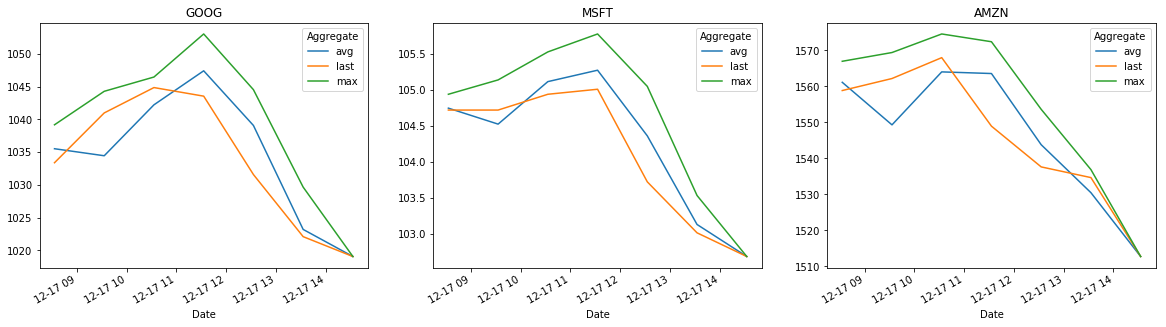

In [29]:
stock_symbols = ['GOOG','MSFT','AMZN']   
fig, axarr = plt.subplots(1,3)
pricesdf = tsdf.loc[tsdf['metric_name']=='price']

for sym, ax in zip(stock_symbols, axarr):
    pricesdf.loc[pricesdf['symbol'] == sym].pivot(columns='Aggregate', values='values').plot(ax=ax, title=sym, figsize=[20,5])

## Read the Twitter + Sentiments feed as Pandas DataFrame
Streaming data generated in by nuclio functions can be read in real-time or historically. <br>It can be distributed to multiple workers for scalability via sharding/partitioning. 

In [25]:
streamdf = client.read(backend='stream', table='stock_stream',seek='earliest', shard_id='0')
#seek='time', start='now-1d'
streamdf.head(15)

,seq_number,user,id,created_at,polarity,subjectivity,stream_time,text
seq_number,,,,,,,,
0,1,@NileshR_Shah,1.074754e+18,Mon Dec 17 19:53:14 +0000 2018,0.316667,0.566667,2018-12-17 19:53:20.550008784,Hey you awesome people at @PeelPublicWorks @re...
1,2,@crispinhunt,1.074754e+18,Mon Dec 17 19:53:23 +0000 2018,0.000000,0.000000,2018-12-17 19:53:29.037741985,‘ CCIA (@Google⁩ etc)..acknowledges that #Art1...
2,3,@MargaretTrucks,1.074754e+18,Mon Dec 17 19:53:30 +0000 2018,-0.022222,0.655556,2018-12-17 19:53:35.434540911,RT @BasedBasterd: As @Google's own CEO says th...
3,4,@Richie__Ryan,1.074754e+18,Mon Dec 17 19:53:33 +0000 2018,0.125000,0.166667,2018-12-17 19:53:39.166423605,.@Google The Russian site listing hundreds of ...
4,5,@UdlaChannelEc,1.074755e+18,Mon Dec 17 19:53:37 +0000 2018,0.000000,0.000000,2018-12-17 19:53:43.256295045,#Internacionales | @Google abrió su primera of...
5,6,@drugshastommo,1.074755e+18,Mon Dec 17 19:53:42 +0000 2018,0.000000,0.000000,2018-12-17 19:53:47.658156679,RT @Meliodaafu: @Seb_Frit @lemondefr Vous êtes...
6,7,@manon_masnt,1.074755e+18,Mon Dec 17 19:53:47 +0000 2018,0.000000,0.000000,2018-12-17 19:53:52.855993293,RT @Meliodaafu: @Seb_Frit @lemondefr Vous êtes...
7,8,@johanthemerican,1.074755e+18,Mon Dec 17 19:53:55 +0000 2018,0.000000,0.000000,2018-12-17 19:54:00.638748654,@Google when will you be offering home service...
8,9,@fightin2Bfree,1.074755e+18,Mon Dec 17 19:54:06 +0000 2018,-0.022222,0.655556,2018-12-17 19:54:12.102388311,RT @BasedBasterd: As @Google's own CEO says th...


## Save Any Data "To Go" as a CSV file (or other formats)

In [10]:
streamdf.to_csv('mystream.csv')